# US Healthcare Data Breach Analysis

## Python libraries used for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import seaborn as sns
import plotly as py

import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

## Reading the dataset

In [2]:
df = pd.read_csv('Data/breach_report.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            3308 non-null   object 
 1   State                             3298 non-null   object 
 2   Covered Entity Type               3304 non-null   object 
 3   Individuals Affected              3307 non-null   float64
 4   Breach Submission Date            3308 non-null   object 
 5   Type of Breach                    3307 non-null   object 
 6   Location of Breached Information  3308 non-null   object 
 7   Business Associate Present        3308 non-null   object 
 8   Web Description                   3058 non-null   object 
dtypes: float64(1), object(8)
memory usage: 232.7+ KB


In [4]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Nissan North America, Inc.",TN,Health Plan,50410.0,12/31/2020,Hacking/IT Incident,"Email, Network Server",Yes,"Magellan Rx Pharmacy, the covered entity (CE),..."
1,Northwestern Memorial Hospital,IL,Healthcare Provider,682.0,12/30/2020,Unauthorized Access/Disclosure,Electronic Medical Record,No,"The covered entity (CE), Northwestern Memorial..."
2,"Home State Health Plan, Inc.",MO,Health Plan,1020.0,12/30/2020,Unauthorized Access/Disclosure,Paper/Films,Yes,"The covered entity (CE), Home State Health Pla..."
3,Beebe Medical Foundation,DE,Healthcare Provider,56953.0,12/28/2020,Hacking/IT Incident,Network Server,Yes,"The covered entity (CE), Beebe Medical Foundat..."
4,"Community Health Resources, Inc",CT,Healthcare Provider,1634.0,12/28/2020,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), Community Health Reso..."


## Data Pre-Processing

In [5]:
df.drop(columns='Web Description', inplace=True)

In [6]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,"Nissan North America, Inc.",TN,Health Plan,50410.0,12/31/2020,Hacking/IT Incident,"Email, Network Server",Yes
1,Northwestern Memorial Hospital,IL,Healthcare Provider,682.0,12/30/2020,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,"Home State Health Plan, Inc.",MO,Health Plan,1020.0,12/30/2020,Unauthorized Access/Disclosure,Paper/Films,Yes
3,Beebe Medical Foundation,DE,Healthcare Provider,56953.0,12/28/2020,Hacking/IT Incident,Network Server,Yes
4,"Community Health Resources, Inc",CT,Healthcare Provider,1634.0,12/28/2020,Unauthorized Access/Disclosure,Email,No


In [7]:
df.isnull().any()

Name of Covered Entity              False
State                                True
Covered Entity Type                  True
Individuals Affected                 True
Breach Submission Date              False
Type of Breach                       True
Location of Breached Information    False
Business Associate Present          False
dtype: bool

In [8]:
df[df['State'].isnull()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
400,Intramural Practice Plan - Medical Sciences Ca...,NaN,Healthcare Provider,439753.0,09/16/2019,Hacking/IT Incident,Network Server,No
482,Bayamon Medical Center Corp.,NaN,Healthcare Provider,422496.0,07/19/2019,Hacking/IT Incident,Network Server,No
483,"Puerto Rico Women And Children's Hospital, LLC",NaN,Healthcare Provider,99943.0,07/19/2019,Hacking/IT Incident,Network Server,No
565,Farmacia La Amistad Inc.,NaN,Healthcare Provider,2500.0,05/24/2019,Hacking/IT Incident,Network Server,No
591,"Inmediata Health Group, Corp.",NaN,Healthcare Clearing House,1565338.0,05/07/2019,Unauthorized Access/Disclosure,Network Server,No
601,"Inspira Behavioral Care, Corp",NaN,Healthcare Provider,4246.0,05/02/2019,Theft,Desktop Computer,No
632,"Metro Santurce, Inc. d/b/a Hospital Pavia Sant...",NaN,Healthcare Provider,305737.0,04/13/2019,Hacking/IT Incident,Network Server,No
1100,"Triple-S Advantage, Inc.",NaN,Health Plan,36305.0,02/02/2018,Unauthorized Access/Disclosure,Paper/Films,No
1992,Puerto Rico Department of Heatlh - Medicaid Pr...,NaN,Health Plan,500.0,04/22/2015,Theft,Other,No
3064,Departamento de Salud de Puerto Rico,NaN,Healthcare Provider,2621.0,02/22/2011,Loss,Other Portable Electronic Device,No


In [9]:
df[df['Covered Entity Type'].isnull()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
998,Boys Town National Research Hospital,NE,NaN,2182.0,05/09/2018,Hacking/IT Incident,Email,Yes
2210,BioReference Laboratories Inc,NJ,NaN,3334.0,07/23/2014,Unauthorized Access/Disclosure,Network Server,Yes
2265,Boston Medical Center,MA,NaN,15265.0,04/29/2014,Unauthorized Access/Disclosure,Network Server,Yes
2340,HealthSource of Ohio Inc.,OH,NaN,8845.0,02/26/2014,Unauthorized Access/Disclosure,Other,Yes


In [10]:
df[df['Individuals Affected'].isnull()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
2507,Valperaiso Fire Department,IN,Health Plan,NaN,09/03/2013,Theft,Desktop Computer,No


In [11]:
df[df['Type of Breach'].isnull()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
3253,"Computer Program and Systems, Inc. (CPSI)",AL,Business Associate,768.0,03/30/2010,NaN,Email,Yes


In [12]:
df['Covered Entity Type'].unique()

array(['Health Plan', 'Healthcare Provider', 'Business Associate',
       'Healthcare Clearing House', nan], dtype=object)

In [13]:
df.dropna(subset=['State', 'Covered Entity Type'], inplace=True)

In [14]:
df['Type of Breach'].unique()

array(['Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft',
       'Improper Disposal', 'Loss', 'Other',
       'Improper Disposal, Unauthorized Access/Disclosure',
       'Theft, Unauthorized Access/Disclosure', 'Loss, Theft',
       'Improper Disposal, Loss, Theft', 'Hacking/IT Incident, Other',
       'Other, Unauthorized Access/Disclosure',
       'Other, Theft, Unauthorized Access/Disclosure',
       'Hacking/IT Incident, Unauthorized Access/Disclosure',
       'Loss, Other', 'Loss, Unauthorized Access/Disclosure',
       'Improper Disposal, Loss', 'Other, Theft', 'Unknown',
       'Hacking/IT Incident, Theft, Unauthorized Access/Disclosure',
       'Loss, Unknown',
       'Improper Disposal, Theft, Unauthorized Access/Disclosure',
       'Other, Unknown', 'Loss, Other, Theft',
       'Hacking/IT Incident, Improper Disposal, Loss, Other, Theft, Unauthorized Access/Disclosure, Unknown',
       'Hacking/IT Incident, Theft', 'Improper Disposal, Theft',
       'Hacking/IT

In [15]:
df['Type of Breach'].fillna('Unknown', inplace=True)

In [16]:
df['Individuals Affected'] = df['Individuals Affected'].fillna(0).astype(np.int64)

In [17]:
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'])

In [18]:
df.insert(loc=5, column='Breach Submission Year', value=df['Breach Submission Date'].dt.year)

In [19]:
df.insert(loc=6, column='Breach Submission Month', value=df['Breach Submission Date'].dt.month)

In [20]:
df.insert(loc=7, column='Breach Submission Day', value=df['Breach Submission Date'].dt.isocalendar().day)

In [21]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Breach Submission Year,Breach Submission Month,Breach Submission Day,Type of Breach,Location of Breached Information,Business Associate Present
0,"Nissan North America, Inc.",TN,Health Plan,50410,2020-12-31,2020,12,4,Hacking/IT Incident,"Email, Network Server",Yes
1,Northwestern Memorial Hospital,IL,Healthcare Provider,682,2020-12-30,2020,12,3,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,"Home State Health Plan, Inc.",MO,Health Plan,1020,2020-12-30,2020,12,3,Unauthorized Access/Disclosure,Paper/Films,Yes
3,Beebe Medical Foundation,DE,Healthcare Provider,56953,2020-12-28,2020,12,1,Hacking/IT Incident,Network Server,Yes
4,"Community Health Resources, Inc",CT,Healthcare Provider,1634,2020-12-28,2020,12,1,Unauthorized Access/Disclosure,Email,No


In [22]:
df['Covered Entity Type'].unique()

array(['Health Plan', 'Healthcare Provider', 'Business Associate',
       'Healthcare Clearing House'], dtype=object)

In [23]:
df['Type of Breach'].unique()

array(['Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft',
       'Improper Disposal', 'Loss', 'Other',
       'Improper Disposal, Unauthorized Access/Disclosure',
       'Theft, Unauthorized Access/Disclosure', 'Loss, Theft',
       'Improper Disposal, Loss, Theft', 'Hacking/IT Incident, Other',
       'Other, Unauthorized Access/Disclosure',
       'Other, Theft, Unauthorized Access/Disclosure',
       'Hacking/IT Incident, Unauthorized Access/Disclosure',
       'Loss, Other', 'Loss, Unauthorized Access/Disclosure',
       'Improper Disposal, Loss', 'Other, Theft', 'Unknown',
       'Hacking/IT Incident, Theft, Unauthorized Access/Disclosure',
       'Loss, Unknown',
       'Improper Disposal, Theft, Unauthorized Access/Disclosure',
       'Other, Unknown', 'Loss, Other, Theft',
       'Hacking/IT Incident, Improper Disposal, Loss, Other, Theft, Unauthorized Access/Disclosure, Unknown',
       'Hacking/IT Incident, Theft', 'Improper Disposal, Theft',
       'Hacking/IT

In [24]:
df_Type_of_Breach = df[(df['Type of Breach'] == 'Theft') | (df['Type of Breach'] == 'Other') | (df['Type of Breach'] == 'Loss') | (df['Type of Breach'] == 'Hacking/IT Incident') |(df['Type of Breach'] == 'Improper Disposal') |(df['Type of Breach'] == 'Unauthorized Access/Disclosure') | (df['Type of Breach'] == 'Unknown')]  

In [25]:
df_Type_of_Breach['Type of Breach'].unique()

array(['Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft',
       'Improper Disposal', 'Loss', 'Other', 'Unknown'], dtype=object)

In [26]:
df['Location of Breached Information'].unique()

array(['Email, Network Server', 'Electronic Medical Record',
       'Paper/Films', 'Network Server', 'Email',
       'Other Portable Electronic Device, Paper/Films',
       'Desktop Computer', 'Other', 'Other Portable Electronic Device',
       'Network Server, Other', 'Laptop',
       'Desktop Computer, Network Server',
       'Desktop Computer, Paper/Films', 'Desktop Computer, Email',
       'Email, Paper/Films', 'Email, Other Portable Electronic Device',
       'Desktop Computer, Electronic Medical Record, Email',
       'Electronic Medical Record, Network Server',
       'Desktop Computer, Electronic Medical Record, Email, Network Server',
       'Electronic Medical Record, Email', 'Other, Paper/Films',
       'Laptop, Other Portable Electronic Device, Paper/Films',
       'Electronic Medical Record, Laptop, Network Server, Paper/Films',
       'Laptop, Other Portable Electronic Device',
       'Electronic Medical Record, Network Server, Other',
       'Desktop Computer, Other',
  

In [27]:
df_Location_of_Breached_Information = df[(df['Location of Breached Information'] == 'Email') | (df['Location of Breached Information'] == 'Network Server') | (df['Location of Breached Information'] == 'Other') | (df['Location of Breached Information'] == 'Laptop') | (df['Location of Breached Information'] == 'Paper/Films') | (df['Location of Breached Information'] == 'Other Portable Electronic Device') | (df['Location of Breached Information'] == 'Desktop Computer') | (df['Location of Breached Information'] == 'Electronic Medical Record')]

In [28]:
df_Location_of_Breached_Information['Location of Breached Information'].unique()

array(['Electronic Medical Record', 'Paper/Films', 'Network Server',
       'Email', 'Desktop Computer', 'Other',
       'Other Portable Electronic Device', 'Laptop'], dtype=object)

In [29]:
df_Location_of_Breached_Information.shape

(2921, 11)

In [30]:
df = df_Type_of_Breach.merge(df_Location_of_Breached_Information).drop_duplicates().reset_index(drop=True)

In [31]:
df['State'] = df['State'].astype('category')

In [32]:
df['Covered Entity Type'] = df['Covered Entity Type'].astype('category')

In [33]:
df['Type of Breach'] = df['Type of Breach'].astype('category').cat.remove_unused_categories()

In [34]:
df['Location of Breached Information'] = df['Location of Breached Information'].astype('category').cat.remove_unused_categories()

In [35]:
df['Business Associate Present'] = df['Business Associate Present'].astype('bool')

In [36]:
df[df.duplicated()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Breach Submission Year,Breach Submission Month,Breach Submission Day,Type of Breach,Location of Breached Information,Business Associate Present


In [37]:
df.isnull().any()

Name of Covered Entity              False
State                               False
Covered Entity Type                 False
Individuals Affected                False
Breach Submission Date              False
Breach Submission Year              False
Breach Submission Month             False
Breach Submission Day               False
Type of Breach                      False
Location of Breached Information    False
Business Associate Present          False
dtype: bool

In [38]:
df.shape

(2851, 11)

In [39]:
df.dtypes

Name of Covered Entity                      object
State                                     category
Covered Entity Type                       category
Individuals Affected                         int64
Breach Submission Date              datetime64[ns]
Breach Submission Year                       int64
Breach Submission Month                      int64
Breach Submission Day                       UInt32
Type of Breach                            category
Location of Breached Information          category
Business Associate Present                    bool
dtype: object

In [40]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Breach Submission Year,Breach Submission Month,Breach Submission Day,Type of Breach,Location of Breached Information,Business Associate Present
0,Northwestern Memorial Hospital,IL,Healthcare Provider,682,2020-12-30,2020,12,3,Unauthorized Access/Disclosure,Electronic Medical Record,True
1,"Home State Health Plan, Inc.",MO,Health Plan,1020,2020-12-30,2020,12,3,Unauthorized Access/Disclosure,Paper/Films,True
2,Beebe Medical Foundation,DE,Healthcare Provider,56953,2020-12-28,2020,12,1,Hacking/IT Incident,Network Server,True
3,"Community Health Resources, Inc",CT,Healthcare Provider,1634,2020-12-28,2020,12,1,Unauthorized Access/Disclosure,Email,True
4,Magnolia Health Plan,MS,Health Plan,759,2020-12-28,2020,12,1,Unauthorized Access/Disclosure,Paper/Films,True


## Data Exploration, Modelling & Visualisation

## 1. When did the data breach occur?

In [41]:
data_breach_per_year = pd.DataFrame(df.groupby('Breach Submission Year')[['Individuals Affected']].count()).reset_index()
data_breach_per_year

,Breach Submission Year,Individuals Affected
0,2009,15
1,2010,159
2,2011,142
3,2012,181
4,2013,250
5,2014,256
6,2015,235
7,2016,292
8,2017,314
9,2018,330


[Text(0, 0.5, 'Number of Incidents')]

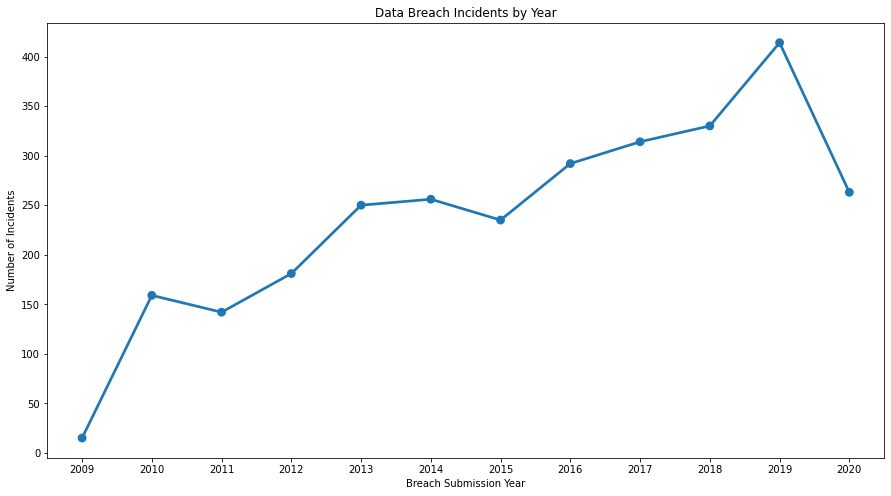

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(x='Breach Submission Year', y='Individuals Affected', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=data_breach_per_year).set_title('Data Breach Incidents by Year')
ax.set(ylabel='Number of Incidents')

In [43]:
data_breach_per_month = pd.DataFrame(df.groupby(['Breach Submission Month'])[['Individuals Affected']].count()).reset_index()
data_breach_per_month

,Breach Submission Month,Individuals Affected
0,1,202
1,2,213
2,3,240
3,4,283
4,5,219
5,6,207
6,7,263
7,8,224
8,9,257
9,10,281


[Text(0, 0.5, 'Number of Incidents')]

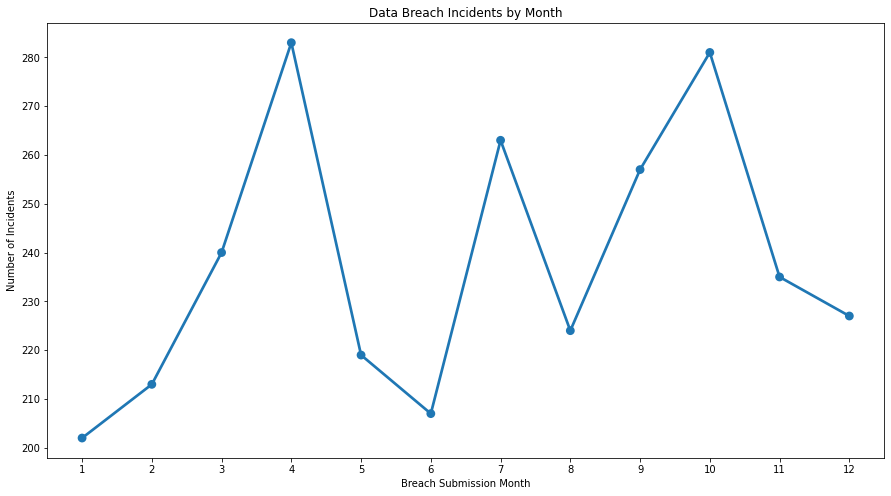

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(x='Breach Submission Month', y='Individuals Affected', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=data_breach_per_month).set_title('Data Breach Incidents by Month')
ax.set(ylabel='Number of Incidents')

In [45]:
data_breach_per_day = pd.DataFrame(df.groupby(['Breach Submission Day'])[['Individuals Affected']].count()).reset_index()
data_breach_per_day

,Breach Submission Day,Individuals Affected
0,1,477
1,2,461
2,3,406
3,4,483
4,5,940
5,6,49
6,7,35


Text(0.5, 1.0, 'Data Breach Incidents by Day')

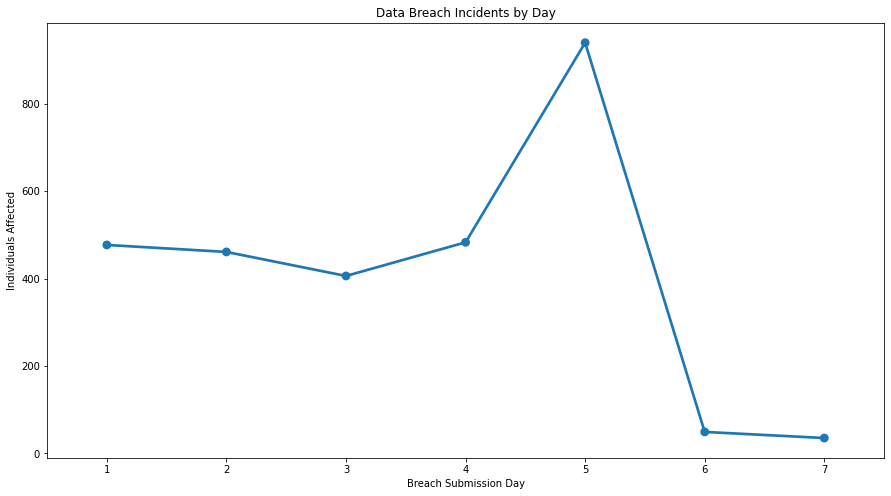

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(x='Breach Submission Day', y='Individuals Affected', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=data_breach_per_day).set_title('Data Breach Incidents by Day')

In [47]:
breach_by_year_month = pd.DataFrame(df.groupby(['Breach Submission Year', 'Breach Submission Month'])[['Individuals Affected']].count()).reset_index()
breach_by_year_month

,Breach Submission Year,Breach Submission Month,Individuals Affected
0,2009,10,2
1,2009,11,9
2,2009,12,4
3,2010,1,10
4,2010,2,11
...,...,...,...
130,2020,8,14
131,2020,9,51
132,2020,10,35
133,2020,11,16


[Text(0.5, 51.0, 'Breach Submission Year')]

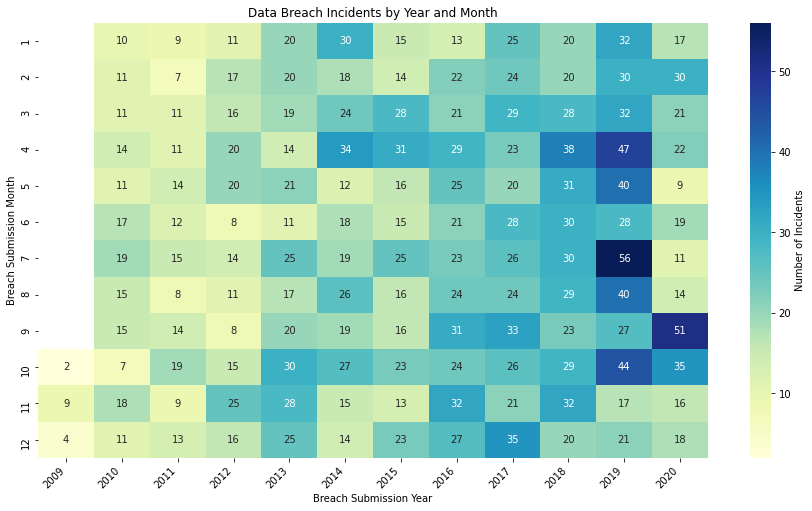

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
data_breach_heatmap = breach_by_year_month.pivot('Breach Submission Month', 'Breach Submission Year', 'Individuals Affected')
#data_breach_heatmap['Individuals Affected'] = data_breach_heatmap['Individuals Affected'].fillna(0).astype(np.int64)
sns.heatmap(annot=True, cmap="YlGnBu",  cbar_kws={'label': 'Number of Incidents'}, data=data_breach_heatmap).set_title('Data Breach Incidents by Year and Month')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.xticks(rotation=45)
ax.set(xlabel='Breach Submission Year')

In [49]:
breach_by_month_day = pd.DataFrame(df.groupby(['Breach Submission Month', 'Breach Submission Day'])[['Individuals Affected']].count()).reset_index()
breach_by_month_day

,Breach Submission Month,Breach Submission Day,Individuals Affected
0,1,1,36
1,1,2,32
2,1,3,24
3,1,4,39
4,1,5,67
...,...,...,...
78,12,3,29
79,12,4,41
80,12,5,65
81,12,6,5


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, '1'),
  Text(1.5, 0, '2'),
  Text(2.5, 0, '3'),
  Text(3.5, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.5, 0, '6'),
  Text(6.5, 0, '7'),
  Text(7.5, 0, '8'),
  Text(8.5, 0, '9'),
  Text(9.5, 0, '10'),
  Text(10.5, 0, '11'),
  Text(11.5, 0, '12')])

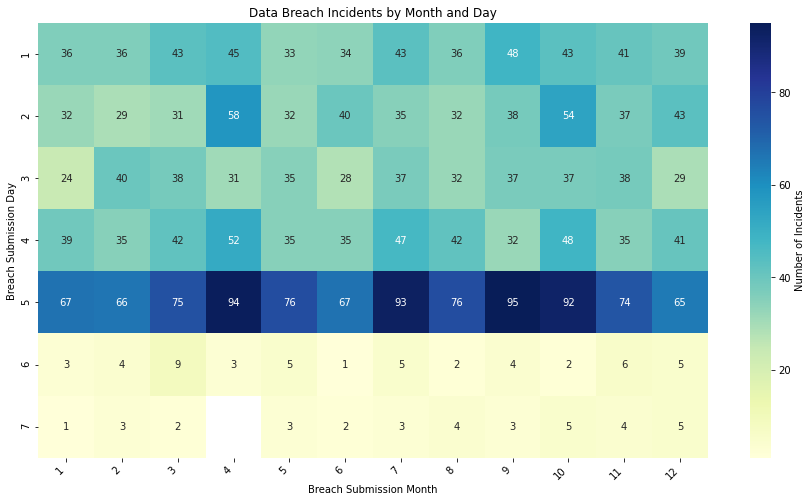

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
data_breach_heatmap = breach_by_month_day.pivot('Breach Submission Day', 'Breach Submission Month', 'Individuals Affected')
sns.heatmap(annot=True, cmap="YlGnBu",  cbar_kws={'label': 'Number of Incidents'}, data=data_breach_heatmap).set_title('Data Breach Incidents by Month and Day')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.xticks(rotation=45)

## 2. What are the causes of Data Breach?

In [51]:
cause_of_breach = pd.DataFrame(df.groupby(['Type of Breach'])[['Individuals Affected']].count()).reset_index()
cause_of_breach

,Type of Breach,Individuals Affected
0,Hacking/IT Incident,907
1,Improper Disposal,86
2,Loss,163
3,Other,72
4,Theft,764
5,Unauthorized Access/Disclosure,848
6,Unknown,11


[Text(0.5, 0, 'Number of Breaches')]

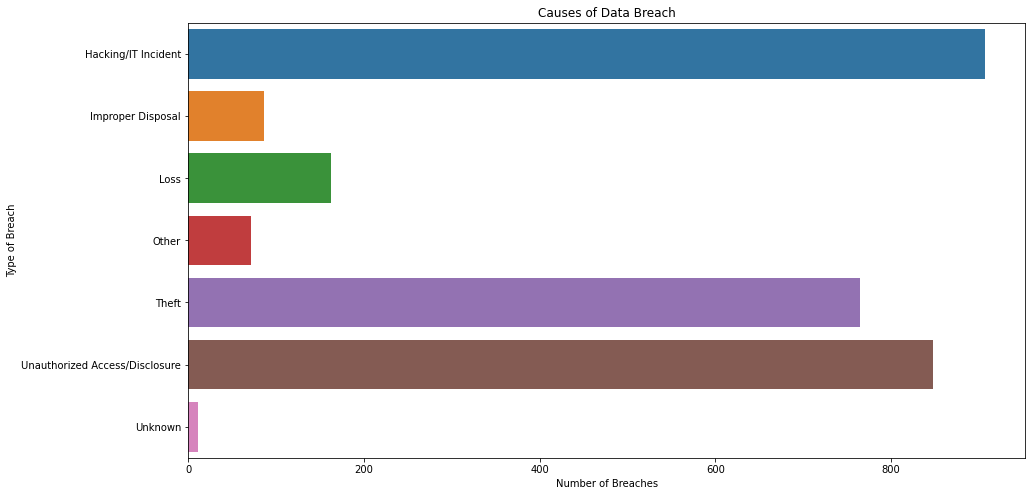

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y='Type of Breach', x='Individuals Affected', data=cause_of_breach).set_title('Causes of Data Breach')
ax.set(xlabel='Number of Breaches')

In [53]:
causes_of_breaches_by_year = pd.DataFrame(df.groupby(['Breach Submission Year', 'Type of Breach'])[['Individuals Affected']].count()).reset_index()
causes_of_breaches_by_year['Individuals Affected'] = causes_of_breaches_by_year['Individuals Affected'].fillna(0).astype(np.int64)
causes_of_breaches_by_year

,Breach Submission Year,Type of Breach,Individuals Affected
0,2009,Hacking/IT Incident,0
1,2009,Improper Disposal,0
2,2009,Loss,1
3,2009,Other,2
4,2009,Theft,12
...,...,...,...
79,2020,Loss,8
80,2020,Other,0
81,2020,Theft,20
82,2020,Unauthorized Access/Disclosure,68


[Text(0.5, 51.0, 'Breach Submission Year')]

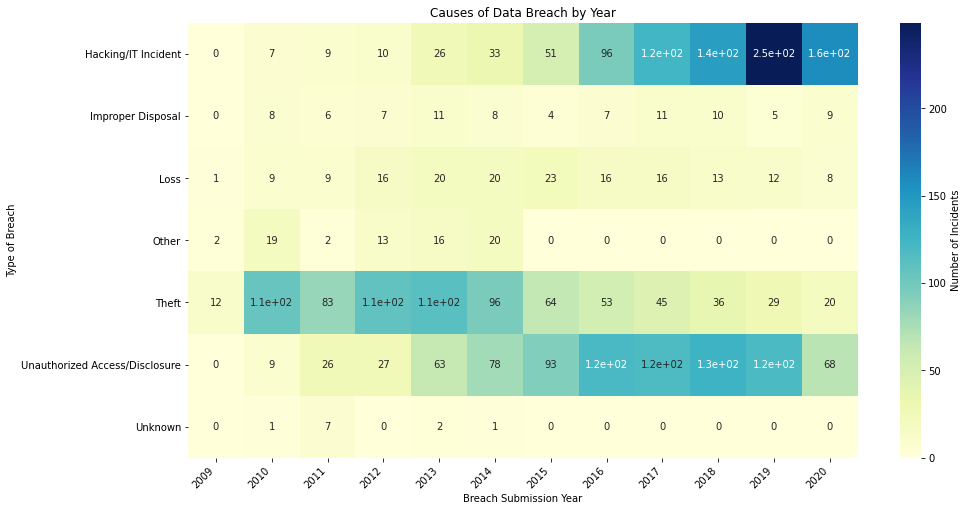

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))
data_breaches_per_year_heatmap = causes_of_breaches_by_year.pivot('Type of Breach', 'Breach Submission Year', 'Individuals Affected')
sns.heatmap(annot=True, cmap="YlGnBu",  cbar_kws={'label': 'Number of Incidents'}, data=data_breaches_per_year_heatmap).set_title('Causes of Data Breach by Year')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.xticks(rotation=45)
ax.set(xlabel='Breach Submission Year')

## 3. Where did the Data Breach occur?

In [55]:
covered_entity_type = pd.DataFrame(df.groupby(['Covered Entity Type'])[['Individuals Affected']].count()).reset_index()
covered_entity_type

,Covered Entity Type,Individuals Affected
0,Business Associate,378
1,Health Plan,402
2,Healthcare Clearing House,5
3,Healthcare Provider,2066


In [56]:
covered_entity_type.iplot(labels='Covered Entity Type', values='Individuals Affected',hole=.5, title='Healthcare Organizations affected by Data Breach', kind='pie')

In [57]:
breaches_per_year = pd.DataFrame(df.groupby(['Covered Entity Type', 'Breach Submission Year'])[['Individuals Affected']].count()).reset_index()
breaches_per_year['Individuals Affected'] = breaches_per_year['Individuals Affected'].fillna(0).astype(np.int64)
breaches_per_year

,Covered Entity Type,Breach Submission Year,Individuals Affected
0,Business Associate,2009,2
1,Business Associate,2010,33
2,Business Associate,2011,31
3,Business Associate,2012,32
4,Business Associate,2013,61
5,Business Associate,2014,60
6,Business Associate,2015,12
7,Business Associate,2016,21
8,Business Associate,2017,17
9,Business Associate,2018,39


[Text(0, 0.5, 'Number of Incidents')]

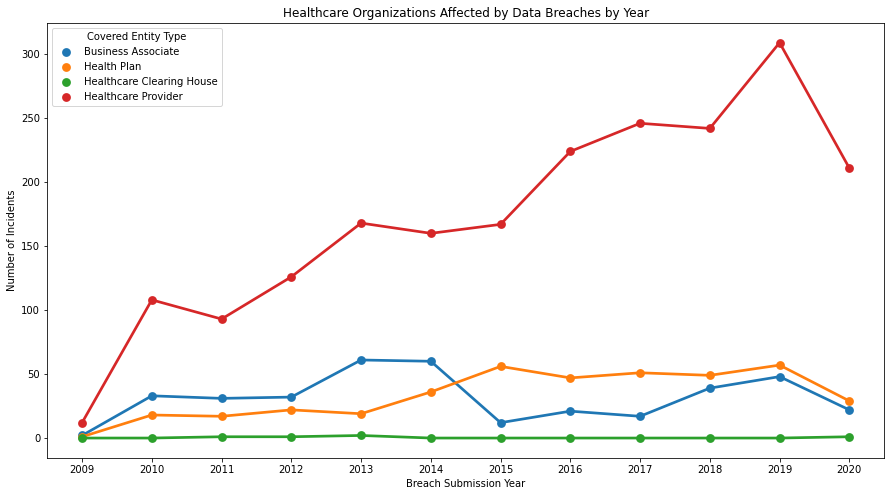

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
sns.pointplot(x='Breach Submission Year', y='Individuals Affected', hue='Covered Entity Type', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=breaches_per_year).set_title('Healthcare Organizations Affected by Data Breaches by Year')
ax.set(ylabel='Number of Incidents')

In [59]:
breaches_by_state = df.groupby('State')[['Individuals Affected']].count().reset_index()

In [60]:
breaches_by_state = breaches_by_state.sort_values(by='Individuals Affected', ascending=False).reset_index(drop=True)
breaches_by_state

,State,Individuals Affected
0,CA,309
1,TX,238
2,FL,183
3,NY,143
4,IL,130
5,PA,106
6,OH,106
7,GA,88
8,IN,83
9,MN,83


In [61]:
data = dict (
    type = 'choropleth',
    colorscale = 'Portland',
    colorbar = go.choropleth.ColorBar(title = "Number of Incidents"),
    locations = breaches_by_state['State'],
    locationmode='USA-states',
    z=breaches_by_state['Individuals Affected'],
)

layout = dict(title = 'Data Breaches in the USA by State',
              geo = dict(scope='usa',
                        projection=dict(type ='albers usa'))
             )

fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

## 4. How did the Data Breaches occur?

In [62]:
location_of_breached_information = pd.DataFrame(df.groupby(['Location of Breached Information'])[['Individuals Affected']].count()).reset_index()
location_of_breached_information

,Location of Breached Information,Individuals Affected
0,Desktop Computer,179
1,Electronic Medical Record,122
2,Email,587
3,Laptop,334
4,Network Server,594
5,Other,257
6,Other Portable Electronic Device,147
7,Paper/Films,631


[Text(0, 0.5, 'Number of Breaches')]

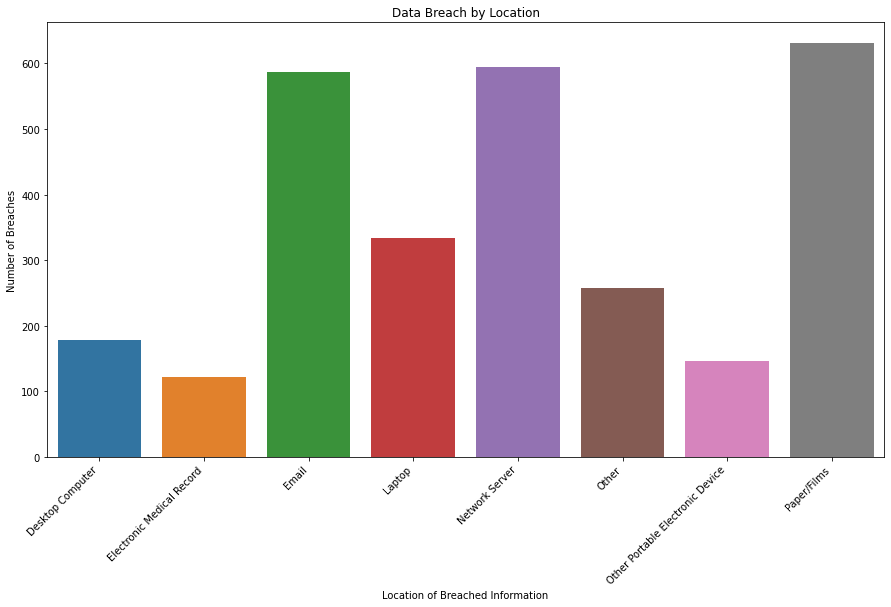

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='Location of Breached Information', data=df).set_title('Data Breach by Location')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.xticks(rotation=45)
ax.set(ylabel='Number of Breaches')

In [64]:
breach_location_by_year = pd.DataFrame(df.groupby(['Location of Breached Information', 'Breach Submission Year'])[['Individuals Affected']].count()).reset_index()
breach_location_by_year['Individuals Affected'] = breach_location_by_year['Individuals Affected'].fillna(0).astype(np.int64)
breach_location_by_year

,Location of Breached Information,Breach Submission Year,Individuals Affected
0,Desktop Computer,2009,5
1,Desktop Computer,2010,21
2,Desktop Computer,2011,19
3,Desktop Computer,2012,22
4,Desktop Computer,2013,32
...,...,...,...
91,Paper/Films,2016,74
92,Paper/Films,2017,60
93,Paper/Films,2018,76
94,Paper/Films,2019,51


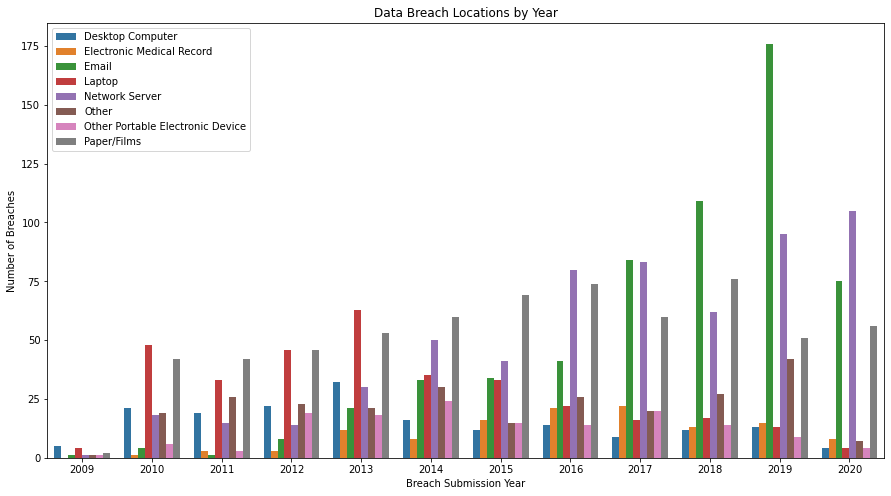

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Breach Submission Year', y='Individuals Affected', hue='Location of Breached Information', data=breach_location_by_year).set_title('Data Breach Locations by Year')
ax.set(ylabel='Number of Breaches')
plt.legend(loc='upper left')

## 5. What is the impact of Data Breach on Indivduals?

In [66]:
df['Individuals Affected'].describe()

count    2.851000e+03
mean     8.056969e+04
std      1.549762e+06
min      0.000000e+00
25%      1.000000e+03
50%      2.500000e+03
75%      9.307000e+03
max      7.880000e+07
Name: Individuals Affected, dtype: float64

In [67]:
individuals_affected_per_year = pd.DataFrame(df.groupby('Breach Submission Year')[['Individuals Affected']].sum()).reset_index()
individuals_affected_per_year

,Breach Submission Year,Individuals Affected
0,2009,131626
1,2010,4674073
2,2011,11002459
3,2012,2219779
4,2013,6881654
5,2014,16147684
6,2015,109134090
7,2016,12431841
8,2017,4495757
9,2018,13129959


Text(0.5, 1.0, 'Individuals Affected per Year')

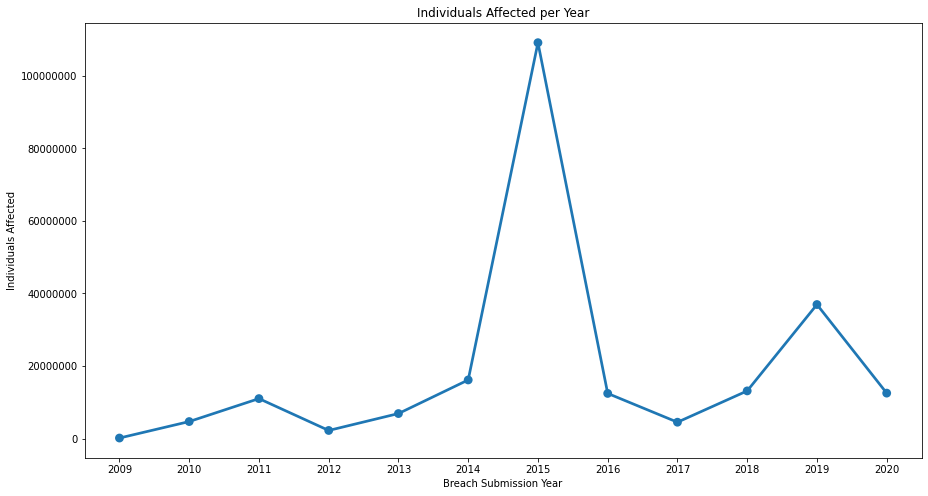

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(x='Breach Submission Year', y='Individuals Affected', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=individuals_affected_per_year).set_title('Individuals Affected per Year')

In [69]:
individuals_affected_by_causes_of_breach = pd.DataFrame(df.groupby(['Type of Breach', 'Breach Submission Year'])[['Individuals Affected']].sum()).reset_index()
individuals_affected_by_causes_of_breach['Individuals Affected'] = individuals_affected_by_causes_of_breach['Individuals Affected'].fillna(0).astype(np.int64)
individuals_affected_by_causes_of_breach

,Type of Breach,Breach Submission Year,Individuals Affected
0,Hacking/IT Incident,2009,0
1,Hacking/IT Incident,2010,91358
2,Hacking/IT Incident,2011,270714
3,Hacking/IT Incident,2012,809597
4,Hacking/IT Incident,2013,286925
...,...,...,...
79,Unknown,2016,0
80,Unknown,2017,0
81,Unknown,2018,0
82,Unknown,2019,0


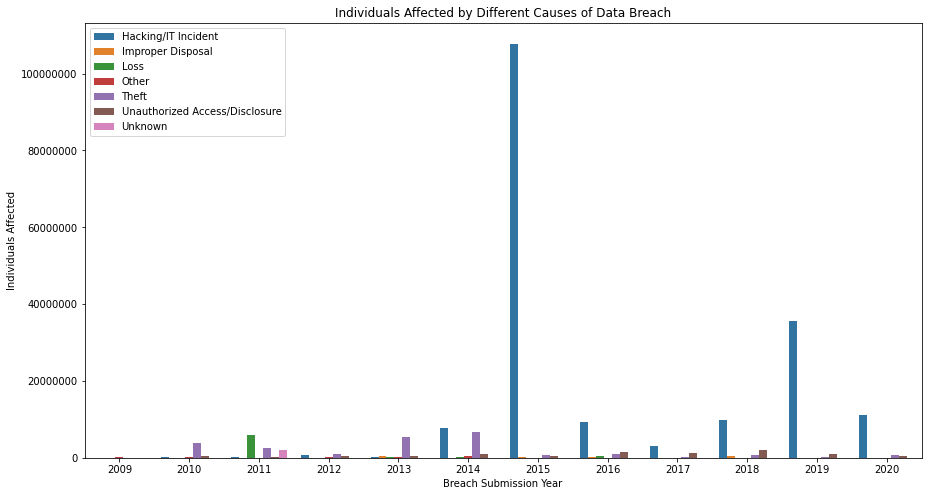

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Breach Submission Year', y='Individuals Affected', dodge=True, hue='Type of Breach', ax=ax.ticklabel_format(useOffset=False, style='plain'), data=individuals_affected_by_causes_of_breach).set_title('Individuals Affected by Different Causes of Data Breach')
plt.legend(loc='upper left')

In [71]:
individuals_affected_by_organisation = pd.DataFrame(df.groupby(['Covered Entity Type', 'Breach Submission Year'])[['Individuals Affected']].sum()).reset_index()
individuals_affected_by_organisation['Individuals Affected'] = individuals_affected_by_organisation['Individuals Affected'].fillna(0).astype(np.int64)
individuals_affected_by_organisation

,Covered Entity Type,Breach Submission Year,Individuals Affected
0,Business Associate,2009,89400
1,Business Associate,2010,385116
2,Business Associate,2011,7131625
3,Business Associate,2012,1070827
4,Business Associate,2013,1054914
5,Business Associate,2014,5962100
6,Business Associate,2015,91425
7,Business Associate,2016,3610504
8,Business Associate,2017,146894
9,Business Associate,2018,5492307


Text(0.5, 1.0, 'Individuals Affected by Data Breach in Healthcare Organizations')

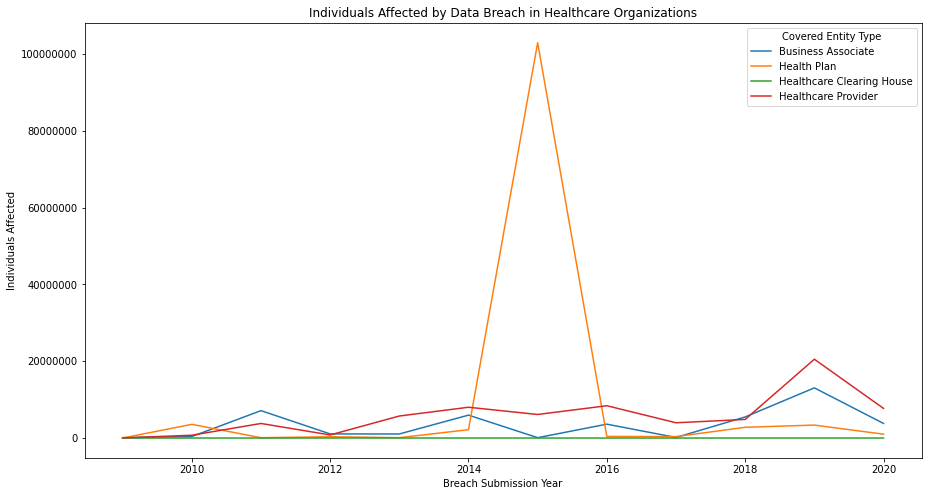

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x='Breach Submission Year', y='Individuals Affected', hue='Covered Entity Type', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=individuals_affected_by_organisation).set_title('Individuals Affected by Data Breach in Healthcare Organizations')

In [73]:
individuals_affected_by_breach_location = pd.DataFrame(df.groupby(['Location of Breached Information', 'Breach Submission Year'])[['Individuals Affected']].sum()).reset_index()
individuals_affected_by_breach_location['Individuals Affected'] = individuals_affected_by_breach_location['Individuals Affected'].fillna(0).astype(np.int64)
individuals_affected_by_breach_location

,Location of Breached Information,Breach Submission Year,Individuals Affected
0,Desktop Computer,2009,18377
1,Desktop Computer,2010,244060
2,Desktop Computer,2011,1978309
3,Desktop Computer,2012,72834
4,Desktop Computer,2013,4304634
...,...,...,...
91,Paper/Films,2016,898003
92,Paper/Films,2017,135221
93,Paper/Films,2018,1162335
94,Paper/Films,2019,163021


Text(0.5, 1.0, 'Individuals Affected by Data Breach Locations')

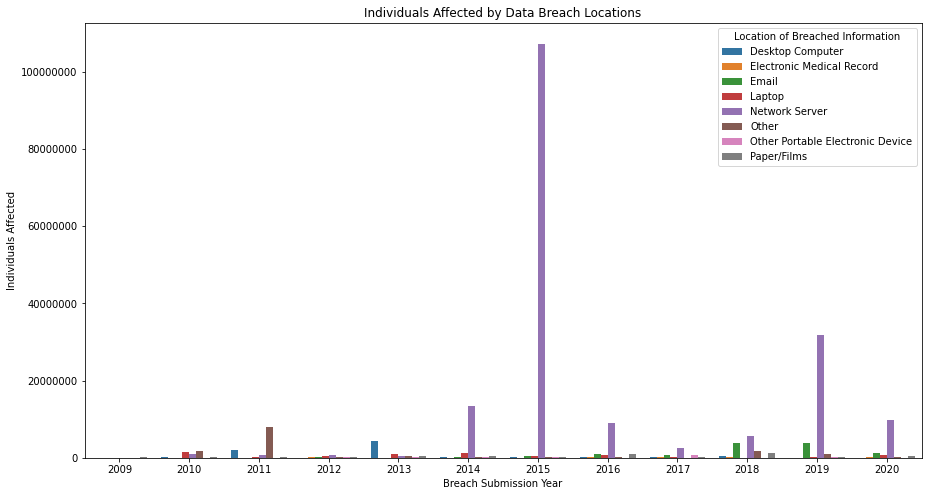

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Breach Submission Year', y='Individuals Affected', hue='Location of Breached Information', ci=None, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=individuals_affected_by_breach_location).set_title('Individuals Affected by Data Breach Locations')

In [75]:
individuals_affected_by_state = df.groupby('State')[['Individuals Affected']].sum().reset_index()
individuals_affected_by_state = individuals_affected_by_state.sort_values(by='Individuals Affected', ascending=False).reset_index(drop=True)
individuals_affected_by_state

,State,Individuals Affected
0,IN,80975428
1,NY,18673523
2,NC,13770712
3,TN,13744068
4,WA,13169118
5,MN,12737323
6,CA,10769191
7,VA,9962356
8,FL,7539098
9,TX,6260905


[Text(0, 0.5, 'Number of Breaches')]

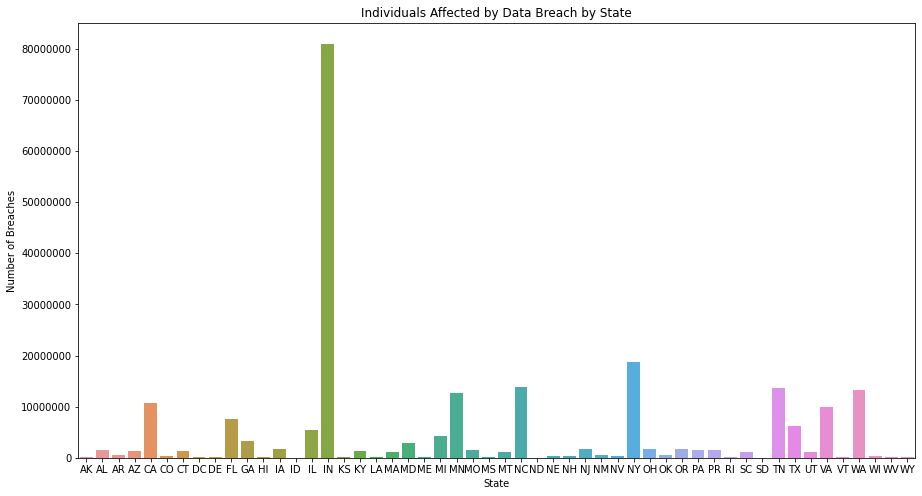

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='State', y='Individuals Affected', ci=False, ax=ax.ticklabel_format(useOffset=False, style='plain'), data=individuals_affected_by_state).set_title('Individuals Affected by Data Breach by State')
ax.set(ylabel='Number of Breaches')

In [77]:
data = dict (
    type = 'choropleth',
    colorscale = 'Portland',
    colorbar = go.choropleth.ColorBar(title = "Individuals Affected"),
    locations = individuals_affected_by_state['State'],
    locationmode='USA-states',
    z=individuals_affected_by_state['Individuals Affected'],
)

layout = dict(title = 'Individuals Affected by Data Breaches in the USA by State',
              geo = dict(scope='usa',
                        projection=dict(type ='albers usa'))
             )

fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)